In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import my_functions as mf # to fetch my helper functions
## After I make changes to the functions in mf it sometimes needs reloading of the current version
import importlib
importlib.reload(mf)

<module 'my_functions' from '/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn-zeba-may25/xenium-cgn/notebooks/13_Clinical_Correlation_Clusters/my_functions.py'>

In [3]:
import os
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

In [4]:
adata = sc.read_h5ad('/data/projects/robin/segmentation/annotate_infl/annotation_infl_compartments.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 3218210 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num', 'compartment', 'inflammation_score', 'is_inflammatory'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_spatial', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [6]:
adata.obs.inflammation_score.describe()

count    3.218210e+06
mean     1.809632e-01
std      1.379984e-01
min      0.000000e+00
25%      7.692308e-02
50%      1.494253e-01
75%      2.551020e-01
max      1.000000e+00
Name: inflammation_score, dtype: float64

In [7]:
inf_sc = adata.obs.copy()

In [8]:
inf_sc.Patient_Sample_ID.unique()

['X8_SLE', 'X7_SLE', 'X6_ANCA', 'X4_ANCA', 'X5_GBM', ..., 'X62_SLE', 'X60_ANCA', 'X59_ANCA', 'X58_ANCA', 'X57_Cntrl']
Length: 63
Categories (63, object): ['X1_Cntrl', 'X2_Cntrl', 'X3_ANCA', 'X4_ANCA', ..., 'X60_ANCA', 'X61_SLE', 'X62_SLE', 'X63_ANCA']

In [9]:
cols_2_drop = ['x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation',
       'area', 'avg_confidence', 'avg_assignment_confidence',
       'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area']

In [10]:
inf_sc.drop(columns =cols_2_drop, inplace=True )

In [11]:
inf_sc.head()

,Slide_ID,batch,Patient_Sample_ID,Disease,n_genes,celltype_l1,celltype_l1_codes,celltype_l1_prob,Biopsy_ID,sample,...,nichepca_glom_no,glom_ID,polygon_flags,is_in_polygon,is_in_glom,is_in_periglom,Slide_num,compartment,inflammation_score,is_inflammatory
cell_CR4f0dee9aa-1,0011762,0,X8_SLE,SLE,10,EC,5,0.980861,0011762 - X2,X8,...,Other,Other_0011762_SLE_X8,,False,False,False,Slide1,Vasculature,0.0,0.0
cell_CR4f0dee9aa-2,0011762,0,X8_SLE,SLE,9,EC,24,0.928363,0011762 - X2,X8,...,Other,Other_0011762_SLE_X8,,False,False,False,Slide1,Vasculature,0.0,0.0
cell_CR4f0dee9aa-3,0011762,0,X8_SLE,SLE,7,MAC,8,0.982235,0011762 - X2,X8,...,Other,Other_0011762_SLE_X8,,False,False,False,Slide1,Inflamed tubulointerstitial,0.5,1.0
cell_CR4f0dee9aa-4,0011762,0,X8_SLE,SLE,11,EC,24,0.999996,0011762 - X2,X8,...,Other,Other_0011762_SLE_X8,,False,False,False,Slide1,Vasculature,0.0,0.0
cell_CR4f0dee9aa-5,0011762,0,X8_SLE,SLE,15,PEC,28,0.999753,0011762 - X2,X8,...,Other,Other_0011762_SLE_X8,,False,False,False,Slide1,Normal tubulointerstitial,0.0,0.0


In [12]:
inf_sc.compartment.unique()

['Vasculature', 'Inflamed tubulointerstitial', 'Normal tubulointerstitial', 'Inflamed periglomerular', 'Inflamed glomerular', 'Other', 'Normal glomerular', 'Normal periglomerular']
Categories (8, object): ['Inflamed glomerular', 'Inflamed periglomerular', 'Inflamed tubulointerstitial', 'Normal glomerular', 'Normal periglomerular', 'Normal tubulointerstitial', 'Other', 'Vasculature']

In [13]:
inf_sc_tub = inf_sc[inf_sc.compartment.str.contains("tubulo")]

In [14]:
inf_sc_tub.compartment.unique()

['Inflamed tubulointerstitial', 'Normal tubulointerstitial']
Categories (8, object): ['Inflamed glomerular', 'Inflamed periglomerular', 'Inflamed tubulointerstitial', 'Normal glomerular', 'Normal periglomerular', 'Normal tubulointerstitial', 'Other', 'Vasculature']

In [15]:
inf_sc_tub_mean = inf_sc_tub.groupby("Patient_Sample_ID", as_index=False)["inflammation_score"].mean()

/tmp/ipykernel_1876/516763535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inf_sc_tub_mean = inf_sc_tub.groupby("Patient_Sample_ID", as_index=False)["inflammation_score"].mean()


In [16]:
inf_sc_tub_mean

,Patient_Sample_ID,inflammation_score
0,X1_Cntrl,0.098846
1,X2_Cntrl,0.076002
2,X3_ANCA,0.170948
3,X4_ANCA,0.157206
4,X5_GBM,0.444065
...,...,...
58,X59_ANCA,0.296620
59,X60_ANCA,0.156317
60,X61_SLE,0.209564
61,X62_SLE,0.116942


In [17]:
inf_sc_tub_mean[["Biopsy_ID", "Disease"]]=inf_sc_tub_mean.Patient_Sample_ID.str.split("_", expand = True)
inf_sc_tub_mean = inf_sc_tub_mean.drop(columns=["Patient_Sample_ID"])


In [18]:
inf_sc_tub_mean

,inflammation_score,Biopsy_ID,Disease
0,0.098846,X1,Cntrl
1,0.076002,X2,Cntrl
2,0.170948,X3,ANCA
3,0.157206,X4,ANCA
4,0.444065,X5,GBM
...,...,...,...
58,0.296620,X59,ANCA
59,0.156317,X60,ANCA
60,0.209564,X61,SLE
61,0.116942,X62,SLE


## Clinical Data 

In [19]:
df_clinical_values = pd.read_csv('./output/ClinicalData_medianPC1.csv')
df_clinical_values

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695


In [20]:
#inf_sc_tub_mean.drop(columns = 'Disease', inplace= True)
merged_df = pd.merge(df_clinical_values, inf_sc_tub_mean, left_on='Biopsy_ID', right_on='Biopsy_ID', how='inner')
merged_df

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1,inflammation_score,Disease
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733,0.117067,ANCA
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051,0.170948,ANCA
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901,0.157206,ANCA
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794,0.249490,ANCA
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072,0.184009,ANCA
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444,0.214297,ANCA
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121,0.278569,ANCA
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400,0.150706,ANCA
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449,0.176152,ANCA
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695,0.099960,ANCA


In [21]:
merged_df.Disease.unique()

array(['ANCA', 'GBM', 'SLE', 'Cntrl'], dtype=object)

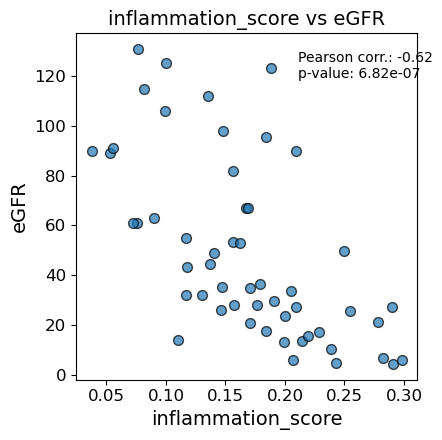

In [22]:
mf.plot_correlation_scatter(
    merged_df, 
    'inflammation_score', 
    'eGFR', 
    label_pos=[0.65, 0.95],
    method='pearson'
)

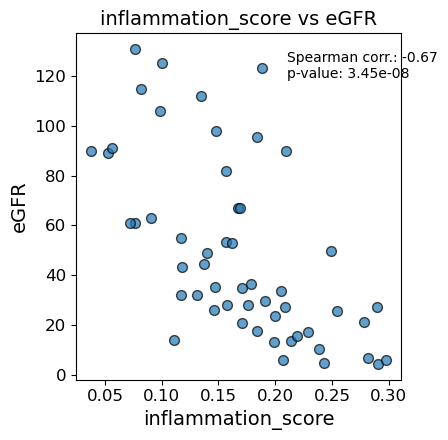

In [23]:
mf.plot_correlation_scatter(
    merged_df, 
    'inflammation_score', 
    'eGFR',
    label_pos=[0.65, 0.95],
    method='spearman'
)

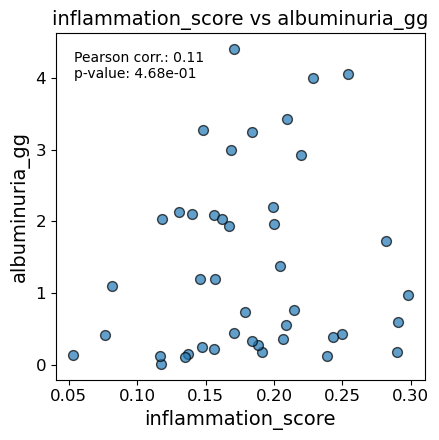

In [24]:
mf.plot_correlation_scatter(
    merged_df, 
    'inflammation_score', 
    'albuminuria_gg', 
    label_pos=[0.05, 0.95],
    method='pearson'
)

In [25]:
merged_df.head()

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1,inflammation_score,Disease
0,X6,81,männlich,0.010,1.2,55.00,ANCA,ARRS low (0/11),X6,5,-0.181733,0.117067,ANCA
1,X3,55,weiblich,0.440,1.6,35.00,ANCA,ARRS medium (2/11),X3,10,0.273051,0.170948,ANCA
2,X4,59,männlich,1.200,2.4,28.26,ANCA,ARRS medium (2/11),X4,7,-0.102901,0.157206,ANCA
3,X17,72,weiblich,0.425,1.1,49.93,ANCA,ARRS low (0/11),X17,14,0.365794,0.249490,ANCA
4,X25,52,männlich,3.250,3.7,17.59,ANCA,ARRS high (8/11),X25,5,0.754072,0.184009,ANCA


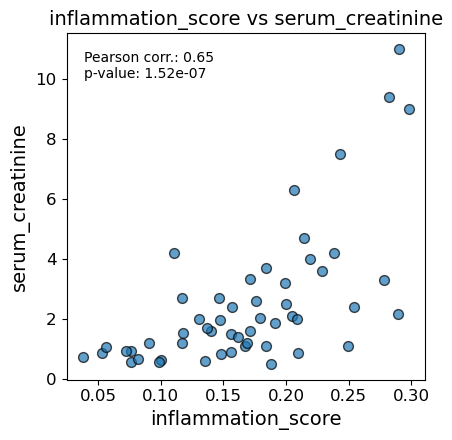

In [26]:
mf.plot_correlation_scatter(
    merged_df, 
    'inflammation_score', 
    'serum_creatinine', 
     label_pos=[0.05, 0.95],
    method='pearson'
)

## For only ANCA patients : correlation with ARR score

In [27]:
ANCA_patients=merged_df[merged_df["disease"] == 'ANCA']

In [28]:
ANCA_patients = ANCA_patients.copy()

ANCA_patients['ARRscore'] = ANCA_patients['ARRscore_SLEclass'].str.extract(r'\((\d+)/')
ANCA_patients["inflammation_score"]=ANCA_patients["inflammation_score"].round(2)

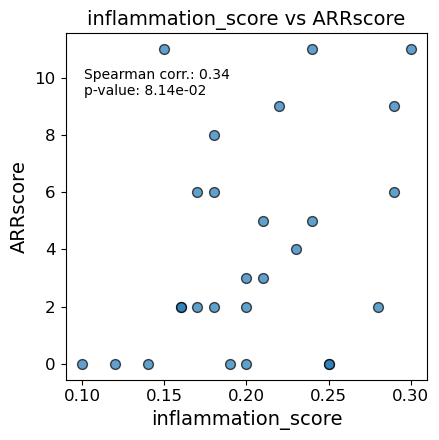

In [29]:
mf.plot_correlation_scatter(
    ANCA_patients, 
    'inflammation_score', 
    'ARRscore', 
    label_pos=[0.05, 0.9],
    method='spearman'
)